## **Dataset: Heart Failure Prediction**

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

**Attribute Information:**

1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

### **Import Library**

In [ ]:
import pandas as pd
import numpy as np

### **Import Data**

In [ ]:
# โหลดข้อมูล
df = pd.read_csv('/content/heart.csv')

### **Explore and Clean Data**

In [ ]:
# ตรวจสอบข้อมูล
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# ตรวจสอบชนิดข้อมูลและค่าว่าง
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             746 non-null    int64  
 1   Sex             746 non-null    object 
 2   ChestPainType   746 non-null    object 
 3   RestingBP       746 non-null    int64  
 4   Cholesterol     746 non-null    int64  
 5   FastingBS       746 non-null    int64  
 6   RestingECG      746 non-null    object 
 7   MaxHR           746 non-null    int64  
 8   ExerciseAngina  746 non-null    object 
 9   Oldpeak         746 non-null    float64
 10  ST_Slope        746 non-null    object 
 11  HeartDisease    746 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 70.1+ KB


In [ ]:
# ตรวจสอบจำนวนแถว และจำนวนคอลัมน์
df.shape

(746, 12)

In [ ]:
# ตรวจสอบ Data type ของแต่ละคอลัมน์
df.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


In [ ]:
# ตรวจสอบค่า Null ในแต่ละคอลัมน์
df.isnull().any()

,0
Age,False
Sex,False
ChestPainType,False
RestingBP,False
Cholesterol,False
FastingBS,False
RestingECG,False
MaxHR,False
ExerciseAngina,False
Oldpeak,False


In [ ]:
# สรุปค่า Null ในแต่ละคอลัมน์
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
# ตรวจสอบข้อมูลซ้ำ
df.duplicated().sum()

np.int64(0)

In [ ]:
# ตรวจสอบ Unique Values
print("Unique values in Sex column:")
print(df['Sex'].unique())

print("\nUnique values in ChestPainType column:")
print(df['ChestPainType'].unique())

print("\nUnique values in RestingECG column:")
print(df['RestingECG'].unique())

print("\nUnique values in ExerciseAngina column:")
print(df['ExerciseAngina'].unique())

print("\nUnique values in ST_Slope column:")
print(df['ST_Slope'].unique())

Unique values in Sex column:
['M' 'F']

Unique values in ChestPainType column:
['ATA' 'NAP' 'ASY' 'TA']

Unique values in RestingECG column:
['Normal' 'ST' 'LVH']

Unique values in ExerciseAngina column:
['N' 'Y']

Unique values in ST_Slope column:
['Up' 'Flat' 'Down']


In [ ]:
# แสดงข้อมูลที่ cholesterol = 0
df[df['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [ ]:
# ลบ row ที่ cholesterol = 0 เนื่องจาก cholesterol ในร่างกายไม่สามารถเป็น 0 ได้
df = df[df['Cholesterol'] != 0]

In [ ]:
# แสดงข้อมูลหลัง clean แล้ว
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# ตรวจสอบ row and column หลัง clean
df.shape

(746, 12)

### **Explore Data with Statistical Values**

In [ ]:
# ค่าสถิติเบื้องต้น
df.describe().round(2)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,746.00,746.00,746.00,746.00,746.00,746.00,746.00
mean,52.88,133.02,244.64,0.17,140.23,0.90,0.48
std,9.51,17.28,59.15,0.37,24.52,1.07,0.50
min,28.00,92.00,85.00,0.00,69.00,-0.10,0.00
25%,46.00,120.00,207.25,0.00,122.00,0.00,0.00
50%,54.00,130.00,237.00,0.00,140.00,0.50,0.00
75%,59.00,140.00,275.00,0.00,160.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


In [ ]:
# นับจำนวนแต่ละเพศที่พบใน Dataset
sex_count = df['Sex'].value_counts()
sex_count

,count
Sex,
M,564
F,182


In [ ]:
heart_disease_by_sex = df.groupby(['Sex', 'HeartDisease']).size().unstack(fill_value=0)
heart_disease_by_sex

HeartDisease,0,1
Sex,,
F,142,40
M,248,316


In [ ]:
# Calculate total cases for each sex
heart_disease_by_sex['Total'] = heart_disease_by_sex.sum(axis=1)

# Calculate percentage for each category (Normal and Heart Disease) within each sex
heart_disease_by_sex_percentage = heart_disease_by_sex.div(heart_disease_by_sex['Total'], axis=0) * 100

# Drop the 'Total' column if you only want percentages of Normal/Disease
heart_disease_by_sex_percentage = heart_disease_by_sex_percentage.drop(columns='Total', errors='ignore')

display(heart_disease_by_sex_percentage.round(2))

HeartDisease,0,1
Sex,,
F,78.02,21.98
M,43.97,56.03


### **Data Visualization**

In [ ]:
# ตั้งค่า Style กราฟ
sns.set_style("whitegrid")

# ดูสัดส่วนของ Target Variable (HeartDisease)
plt.figure(figsize=(6, 6))
df['HeartDisease'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], labels=['Normal (0)', 'Heart Disease (1)'])
plt.title('Distribution of Heart Disease')
plt.ylabel('')
plt.show()

NameError: name 'sns' is not defined

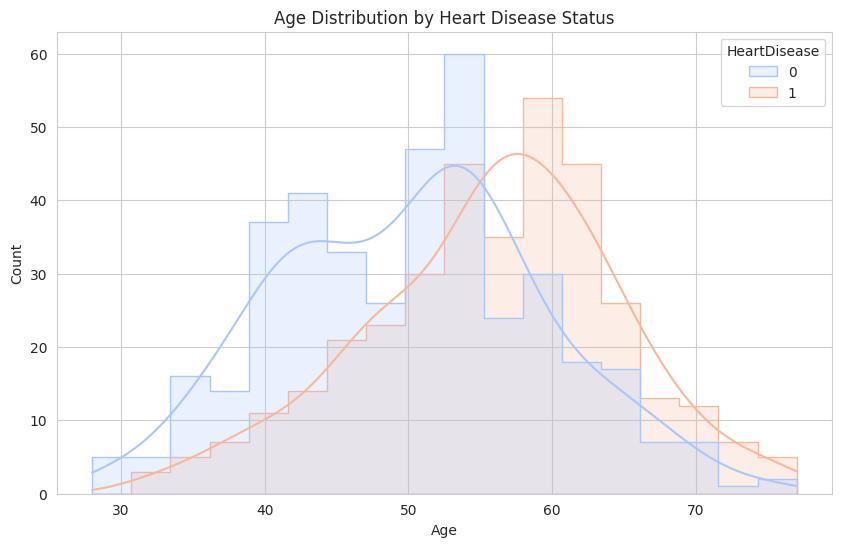

In [ ]:
# ดูการกระจายตัวของอายุ (Age) แยกตามกลุ่มโรคหัวใจ
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='HeartDisease', kde=True, palette='coolwarm', element="step")
plt.title('Age Distribution by Heart Disease Status')
plt.show()

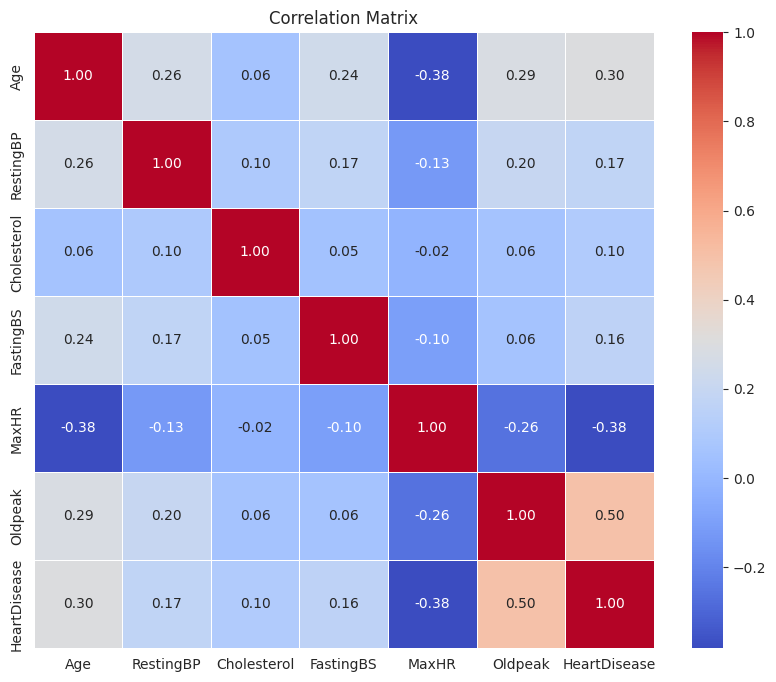

In [ ]:
# ความสัมพันธ์ระหว่างตัวแปรตัวเลข (Correlation Matrix)
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**คำถามที่ 1: อาการเจ็บหน้าอกแบบไหน (ChestPainType) ที่เสี่ยงเป็นโรคหัวใจมากที่สุด?**

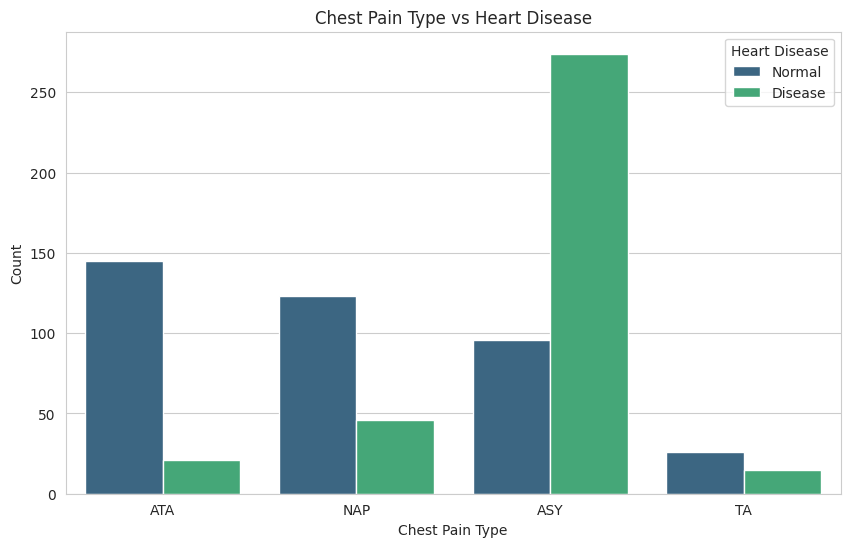

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ChestPainType', hue='HeartDisease', palette='viridis')
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['Normal', 'Disease'])
plt.show()

**คำถามที่ 2: อัตราการเต้นของหัวใจสูงสุด (MaxHR) สัมพันธ์กับอายุและความเสี่ยงโรคอย่างไร?**

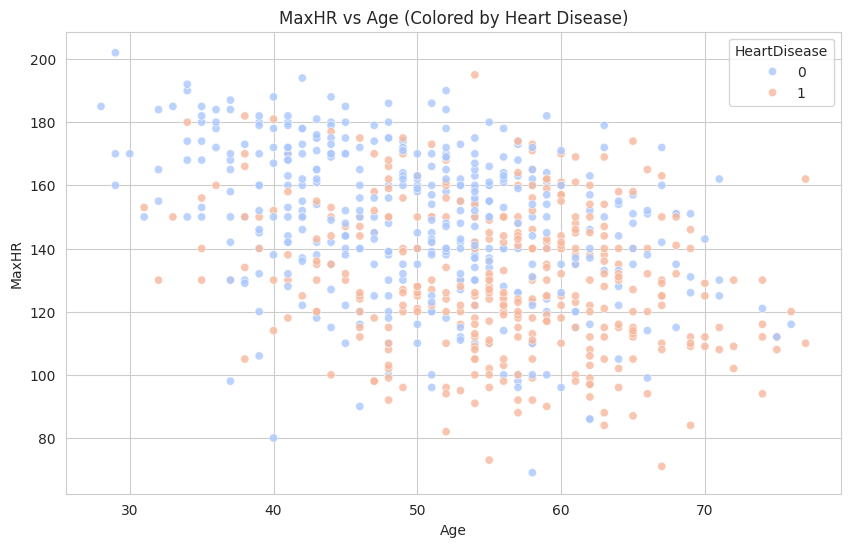

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='MaxHR', hue='HeartDisease', palette='coolwarm', alpha=0.8)
plt.title('MaxHR vs Age (Colored by Heart Disease)')
plt.show()

**คำถามที่ 3: เพศไหนมีความเสี่ยงต่อการเป็นโรคหัวใจมากกว่า?**

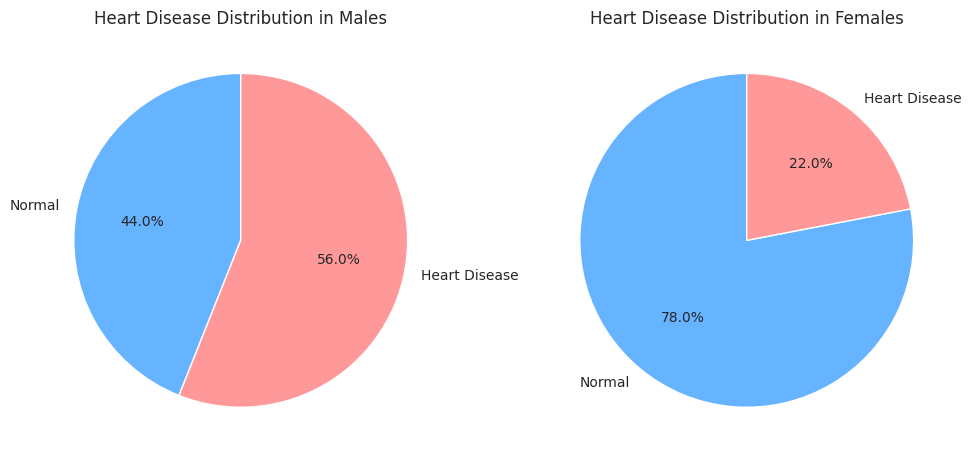

In [ ]:
heart_disease_by_sex = df.groupby(['Sex', 'HeartDisease']).size().unstack(fill_value=0)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart for Heart Disease in Males
axes[0].pie(heart_disease_by_sex.loc['M'], labels=['Normal', 'Heart Disease'], autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'], startangle=90)
axes[0].set_title('Heart Disease Distribution in Males')

# Pie chart for Heart Disease in Females
axes[1].pie(heart_disease_by_sex.loc['F'], labels=['Normal', 'Heart Disease'], autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'], startangle=90)
axes[1].set_title('Heart Disease Distribution in Females')

plt.tight_layout()
plt.show()

**ต่อ EDA ให้เสร็จ**



---



**import Library**

In [96]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


**กำหนดคอลัมน์ตัวเลขและหมวดหมู่**

In [97]:
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS']

แยก X (features) และ y (label)

X คือข้อมูลอินพุตที่โมเดลใช้เรียนรู้


y คือผลลัพธ์/คลาสเป้าหมาย (0 = ไม่มี, 1 = เป็นโรคหัวใจ)


In [98]:
cat_categories = [
    ['M', 'F'],                       # Sex
    ['ATA', 'NAP', 'ASY', 'TA'],      # ChestPainType
    ['Normal', 'ST', 'LVH'],          # RestingECG
    ['N', 'Y'],                       # ExerciseAngina
    ['Up', 'Flat', 'Down'],           # ST_Slope
    [0, 1]                            # FastingBS (0 or 1)
]

**One-Hot Encoding**

In [99]:
ohe = OneHotEncoder(categories=cat_categories,
                    handle_unknown='ignore',
                    sparse_output=False)

In [110]:
X_num = df[numeric_features].to_numpy()
X_cat = df[categorical_features]


print(f"X_cat shape (after update): {X_cat.shape}")

X_cat shape (after update): (746, 6)


In [101]:
# สร้าง OneHotEncoder ใหม่ด้วย cat_categories ที่อัปเดตแล้ว
ohe = OneHotEncoder(categories=cat_categories,
                    handle_unknown='ignore',
                    sparse_output=False)

# fit_transform X_cat
X_cat_encoded = ohe.fit_transform(X_cat)

# ต่อเมทริกซ์: ตัวเลข + one-hot
X_encoded = np.hstack([X_num, X_cat_encoded])
y = df['HeartDisease'].to_numpy()

print(f"X_encoded shape: {X_encoded.shape}, y shape: {y.shape}")

X_encoded shape: (746, 21), y shape: (746,)


**Train-Test Split**

In [102]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Train: (596, 21), Test: (150, 21)


**Scaling เฉพาะคอลัมน์ตัวเลข (fit จาก train เท่านั้น)**

In [103]:
n_num = len(numeric_features)
scaler = StandardScaler()

# fit จาก train และ transform ทั้ง train/test เฉพาะคอลัมน์ตัวเลข
X_train[:, :n_num] = scaler.fit_transform(X_train[:, :n_num])
X_test[:, :n_num]  = scaler.transform(X_test[:, :n_num])

**เทรนและประเมิน Logistic Regression**

In [112]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("=== Logistic Regression  ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Report:\n", classification_report(y_test, y_pred_lr))

=== Logistic Regression  ===
Accuracy: 0.8533333333333334
Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.86        78
           1       0.83      0.88      0.85        72

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150



**เทรนและประเมิน KNN**

In [105]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("=== KNN (Encode-before-split) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Report:\n", classification_report(y_test, y_pred_knn))

=== KNN (Encode-before-split) ===
Accuracy: 0.8733333333333333
Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88        78
           1       0.87      0.86      0.87        72

    accuracy                           0.87       150
   macro avg       0.87      0.87      0.87       150
weighted avg       0.87      0.87      0.87       150



In [106]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(1, 21)  # Test n_neighbors from 1 to 20
}

# สร้างโมเดล
knn_model = KNeighborsClassifier()

# ตั้งค่าGridSearchCV
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters for KNN:", grid_search.best_params_)
print("Best Cross-validation Accuracy for KNN:", grid_search.best_score_)

# นำโมเดลที่ดีที่สุดมาทำนายชุดทดสอบ
best_knn = grid_search.best_estimator_
y_pred_best_knn = best_knn.predict(X_test)

# ประเมินผลบนชุดทดสอบ
print("\n=== Best KNN Model (GridSearchCV) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_best_knn))
print("Report:\n", classification_report(y_test, y_pred_best_knn))

Best Parameters for KNN: {'n_neighbors': 10}
Best Cross-validation Accuracy for KNN: 0.8556442577030812

=== Best KNN Model (GridSearchCV) ===
Accuracy: 0.86
Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        78
           1       0.88      0.82      0.85        72

    accuracy                           0.86       150
   macro avg       0.86      0.86      0.86       150
weighted avg       0.86      0.86      0.86       150



**Confusion Matrix**

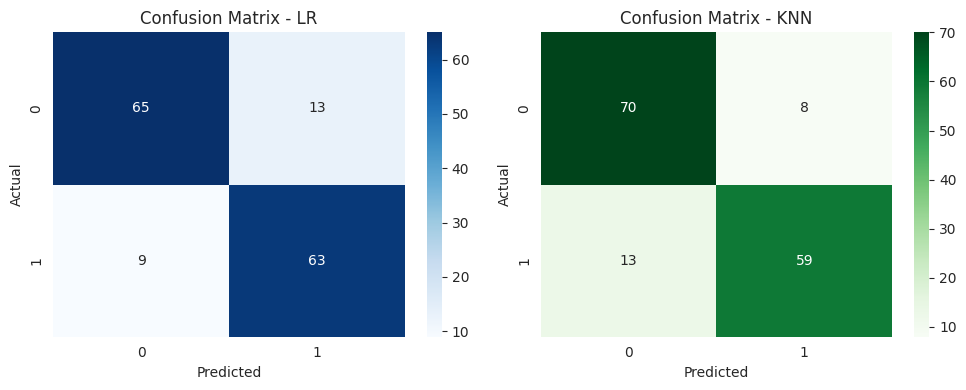

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_knn = confusion_matrix(y_test, y_pred_best_knn)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - LR')
axes[0].set_xlabel('Predicted'); axes[0].set_ylabel('Actual')

sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Confusion Matrix - KNN')
axes[1].set_xlabel('Predicted'); axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [108]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate metrics for Logistic Regression
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)

# Calculate metrics for Best KNN
knn_accuracy = accuracy_score(y_test, y_pred_best_knn)
knn_precision = precision_score(y_test, y_pred_best_knn)
knn_recall = recall_score(y_test, y_pred_best_knn)
kNN_f1 = f1_score(y_test, y_pred_best_knn)

# Create a DataFrame to display the results
metrics_summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'Best KNN'],
    'Accuracy': [lr_accuracy, knn_accuracy],
    'Precision': [lr_precision, knn_precision],
    'Recall': [lr_recall, knn_recall],
    'F1-Score': [lr_f1, knn_f1]
})

display(metrics_summary.round(4))

# Extract TP, TN, FP, FN for Logistic Regression
tp_lr = cm_lr[1, 1]
tn_lr = cm_lr[0, 0]
fp_lr = cm_lr[0, 1]
fn_lr = cm_lr[1, 0]

# Extract TP, TN, FP, FN for Best KNN
tp_knn = cm_knn[1, 1]
tn_knn = cm_knn[0, 0]
fp_knn = cm_knn[0, 1]
fn_knn = cm_knn[1, 0]

# Create a DataFrame to display the results
confusion_matrix_summary = pd.DataFrame({
    'Metric': ['True Positives (TP)', 'True Negatives (TN)', 'False Positives (FP)', 'False Negatives (FN)'],
    'Logistic Regression': [tp_lr, tn_lr, fp_lr, fn_lr],
    'Best KNN': [tp_knn, tn_knn, fp_knn, fn_knn]
})

display(confusion_matrix_summary)

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.8533,0.8289,0.8750,0.8514
1,Best KNN,0.8600,0.8806,0.8194,0.7000


,Metric,Logistic Regression,Best KNN
0,True Positives (TP),63,59
1,True Negatives (TN),65,70
2,False Positives (FP),13,8
3,False Negatives (FN),9,13




---



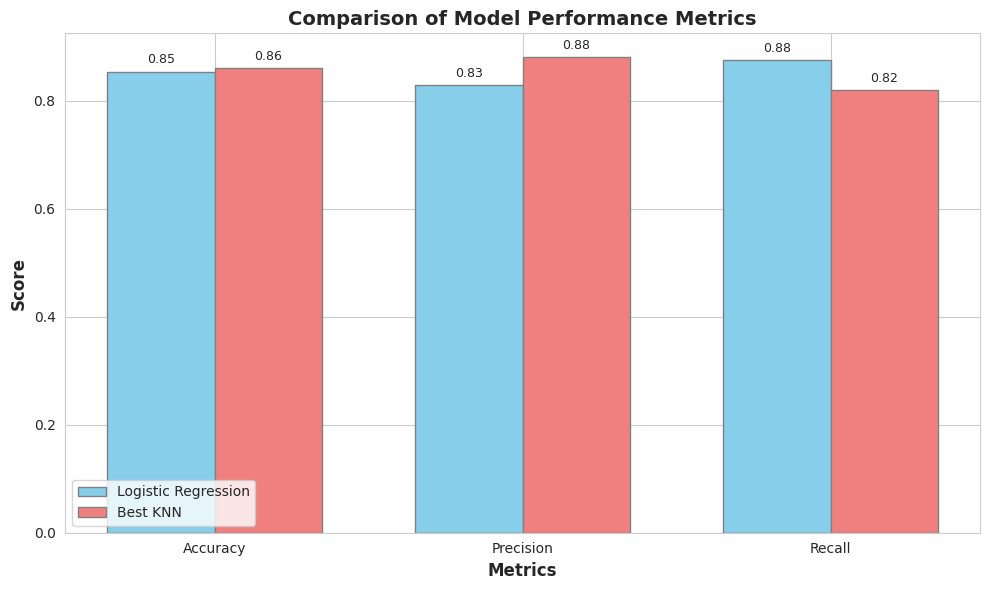

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# ตั้งค่าสไตล์กราฟ
sns.set_style("whitegrid")

# เตรียมข้อมูลสำหรับกราฟ
metrics_to_plot = ['Accuracy', 'Precision', 'Recall']

# สร้างกราฟแท่ง
fig, ax = plt.subplots(figsize=(10, 6))

# กำหนดความกว้างของแท่ง
bar_width = 0.35

# ตำแหน่งของแท่ง
r1 = np.arange(len(metrics_to_plot))
r2 = [x + bar_width for x in r1]

# สร้างแท่งของ Logistic Regression
ax.bar(r1, metrics_summary.loc[metrics_summary['Model'] == 'Logistic Regression', metrics_to_plot].values[0],
       color='skyblue', width=bar_width, edgecolor='grey', label='Logistic Regression')

# สร้างแท่งของ Best KNN
ax.bar(r2, metrics_summary.loc[metrics_summary['Model'] == 'Best KNN', metrics_to_plot].values[0],
       color='lightcoral', width=bar_width, edgecolor='grey', label='Best KNN')

# เพิ่มป้ายกำกับ, ชื่อแกน และชื่อเรื่อง
ax.set_xlabel('Metrics', fontweight='bold', fontsize=12)
ax.set_ylabel('Score', fontweight='bold', fontsize=12)
ax.set_title('Comparison of Model Performance Metrics', fontweight='bold', fontsize=14)
ax.set_xticks([r + bar_width / 2 for r in range(len(metrics_to_plot))])
ax.set_xticklabels(metrics_to_plot)
ax.legend()

# เพิ่มค่าบนแท่งกราฟ
for i, model in enumerate(metrics_summary['Model']):
    for j, metric in enumerate(metrics_to_plot):
        score = metrics_summary.loc[metrics_summary['Model'] == model, metric].values[0]
        x_pos = r1[j] if model == 'Logistic Regression' else r2[j]
        ax.text(x_pos, score + 0.01, f'{score:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


จากการประเมินผลด้วย Confusion Matrix และค่าเมตริกสำคัญต่างๆ พบว่าทั้งสองแบบจำลองมีประสิทธิภาพโดยรวม (Accuracy) ใกล้เคียงกัน อย่างไรก็ตาม **เพื่อลดการวินิจฉัยผิดพลาดว่า 'ปกติ' ในผู้ป่วยที่จริงแล้ว 'เป็นโรค' (เพื่อไม่ให้พลาดการรักษาที่สำคัญ) Logistic Regression อาจจะดีกว่าเล็กน้อยในแง่ของ False Negatives ที่ต่ำกว่า**


ดังนั้น เมื่อเราต้องการ ลด FN (เพื่อให้มั่นใจว่าเราจะไม่พลาดผู้ป่วยที่เป็นโรคจริงๆ) นั่นหมายความว่าเราต้องการให้โมเดลสามารถระบุผู้ป่วยที่เป็นโรคได้มากที่สุดเท่าที่จะทำได้